# Visual Inspection  of Health Center -  Cardsheet  and CG Generated  Data

This is a part of a Ph.D research project entitled with "Developing clincal decision support point of care instrument for low resource settings". It's supervised by  Bart Jansen (Prof), Frank Verbeke (Prof), Jan Cornelis (Prof), Girum Ketema (Ass.Prof) and Demesewu Amenu (Associate Prof). 
  

# Ehtiopian Primary Health System (Highlights) 

1. The public health  care system in Ethiopia is structured around the concept of a “health network model” that uses a three tiered health care delivery levels namely primary, secondary and tertiary levels with defined populations to be served at each level.  

2. For rural settings at the base is the primary health care unit that is a health centre with five satellite health posts catering to a population of 25,000; followed by  a primary hospital, serving a population of  60,000 to 100,000; and next a general  hospital, providing services to 1 up to 1.5 million beneficiaries.  For urban setting at the base is a health center serving 40,000 people, followed by a general hospital as in the rural setting. At the apex of both structures is specialized hospital which serves 3.5 to 5 million people



In [1]:
#importing the required labraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holoviews as hv
import datashader as ds
import dask as dask
import bokeh as bokeh
#import chart_studio.plotly as py
import holoviews as hv
import datashader as ds
import dask as dask
import bokeh as bokeh
import cufflinks as cf


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)
import ipywidgets as widgets
from ipywidgets import SelectionSlider
from ipywidgets import interact, interact_manual
import os
from IPython.display import Image


# Reference file used w  

In [2]:
#to be added soon

# Facts and challenges of the healthcenter service 

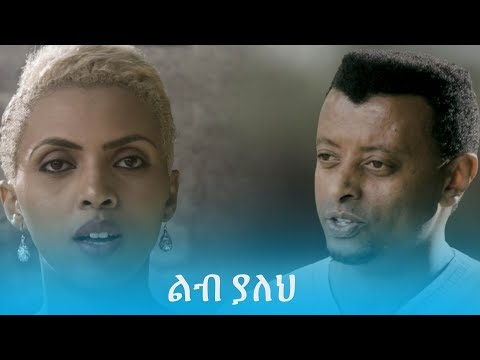

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('rsOeJFYro2Y', start=13)

# Q ? 

Inspecting the card-sheet and CG to uncover and answer:
1. How are the diseases responsible for a certain complaint? 
2. Whcih disease are serious and treatble?
3. How the treatment and referral decision is made?  
4. What are the relevant findings form each or these diseases?


# Part -I : Health Center - Cardsheet 

1. Import the CSV cardsheet dataset

In [4]:
#import the health cetner RRL (wit ICPC-2 and ICD11 format)

#pregancy detail dataset: PregnacyDetailbyCat-Table 1.csv
#All hc dataset: AllHCDataset-Table 1.csv 
#Aug 2 oct dataset:Aug2OctPart2-Table 1.csv
#april2june dataset: April2JunePart1-Table 1.csv

hcdf = pd.read_csv("AllHCDataset-Table 1.csv", encoding='utf-8')


2. Splitting TR_Date

In [5]:
#Splitting the date into year, month and date
hcdf['TR_Date'] = pd.to_datetime(hcdf.TR_Date,errors='coerce')
hcdf['Day'],hcdf['Month'],hcdf['Year'] = hcdf.TR_Date.dt.day, hcdf.TR_Date.dt.month, hcdf.TR_Date.dt.year

#display the new RRL list  
#interacting with the raw healthcenter CSV dataset
@interact
def show_referral_by_age(column=["SN"],x=(5,1000,5)):
    return hcdf.loc[hcdf[column] >x]

,SN,Disease_Name,SignandSymptoms_1,SignandSymptoms_2,SignandSymptoms_3,SignandSymptoms_4,SignandSymptoms_5,SignandSymptoms_6,SignandSymptoms_7,SignandSymptoms_8,...,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions,Day,Month,Year
202,502,Acute Febrile Illness,chillness,Headache,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,3.0,4.0,2010.0
203,510,Acute Febrile Illness,chillness,Headache,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,3.0,5.0,2010.0
204,513,Acute Febrile Illness,chillness,Headache,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,3.0,5.0,2010.0
205,516,Acute Febrile Illness,chillness,Headache,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,3.0,5.0,2010.0
206,761,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,NaN,NaN,NaN
207,764,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,NaN,NaN,NaN
208,766,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,27.0,2.0,2011.0
209,767,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,27.0,2.0,2011.0
210,768,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,27.0,2.0,2011.0
211,769,Acute Febrile Illness,Headache,Fever,NaN,NaN,NaN,NaN,NaN,NaN,...,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...,27.0,2.0,2011.0


In [6]:
hcdf.shape

(1964, 29)

2. Filiter by ICPC2_Classfication

In [7]:
#Health center cardsheet data fliter by ICPC2  and disease name

#Step-1: a generic fucntion is rquired to capture uniques unique values 
ALL = 'ALL' 
def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#Step-2: intialize a variable to capture the ICPC2 and Disease 

output = widgets.Output()

icpc2Classfication = widgets.Dropdown(options =unique_sorted_values(hcdf.ICPC2_Classfication.astype(str)), description="Ref. Reason")
diseaseName = widgets.Dropdown(options =unique_sorted_values(hcdf.Disease_Name),description="Feedback: ")

#Step-3: Write an event-handeler function     
def healthCenter_flitering(icpc2, diseasename):
    output.clear_output()

    if (icpc2 == ALL) & (diseasename == ALL):
        healthCenter_fliter = hcdf
    elif (icpc2 == ALL):
        healthCenter_fliter = hcdf[hcdf.Disease_Name == diseasename]
    elif (diseasename == ALL):
        healthCenter_fliter = hcdf[hcdf.ICPC2_Classfication == icpc2]
    else:
        healthCenter_fliter = hcdf[(hcdf.ICPC2_Classfication == icpc2) & 
                                  (hcdf.Disease_Name == diseasename)]
    
    with output:
        display(healthCenter_fliter)
        
#Step-4 : Bind to the event handler to the dropdown value         
def healthCenter_icpc2_eventhandler(change):
    healthCenter_flitering(change.new, icpc2Classfication.value)
def healthCenter_diseasename_eventhandler(change):
    healthCenter_flitering(icpc2Classfication.value, change.new)
    
icpc2Classfication.observe(healthCenter_icpc2_eventhandler, names='value')
diseaseName.observe(healthCenter_diseasename_eventhandler, names='value')

# Step-5: Display the result
display(icpc2Classfication)
display(diseaseName)
display(output)

Dropdown(description='Ref. Reason', options=('ALL', 'Blood, Blood Forming Organs and Immune Mechanism \n', 'Ca…

Dropdown(description='Feedback: ', options=('ALL', 'AGE', 'Acute Febrile Illness', 'Anemia', 'CPD', 'DM', 'Dys…

Output()

In [8]:
hcdf.shape

(1964, 29)

In [9]:
hcdf.CP.value_counts()

Treated    1763
Refer       201
Name: CP, dtype: int64

In [10]:
#count the missing value
hcdf.count()

SN                       1964
Disease_Name             1964
SignandSymptoms_1        1917
SignandSymptoms_2        1426
SignandSymptoms_3         496
SignandSymptoms_4         206
SignandSymptoms_5         167
SignandSymptoms_6         107
SignandSymptoms_7          59
SignandSymptoms_8          32
SignandSymptoms_9          46
Emergency_Sign            583
Visiting_Date            1964
Finding                  1949
RelatedDisease_Yes        419
RelatedDisease_No        1568
CP                       1964
TR_Date                  1423
ICPC2_Classfication      1961
ICD11_Classfication      1919
ICD11_Parent_Category    1919
MatchingTerms1           1919
MatchingTerms2           1919
MatchingTerms3           1918
MatchingTerms4           1911
Descriptions             1618
Day                      1423
Month                    1423
Year                     1423
dtype: int64

Building Histogram for categorical values or objects 

In [11]:
#building Histogram for categorical values or objects 
@interact 
def hist(x=list(hcdf.select_dtypes('object').columns),
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    hcdf[x].iplot(kind='hist', x=x, mode='markers', xTitle='x',
                   yTitle='count', title='Distribution',
                   theme=theme, colorscale=colorscale)

Interactive visulization: Inspecting objects or catagorical attributes 

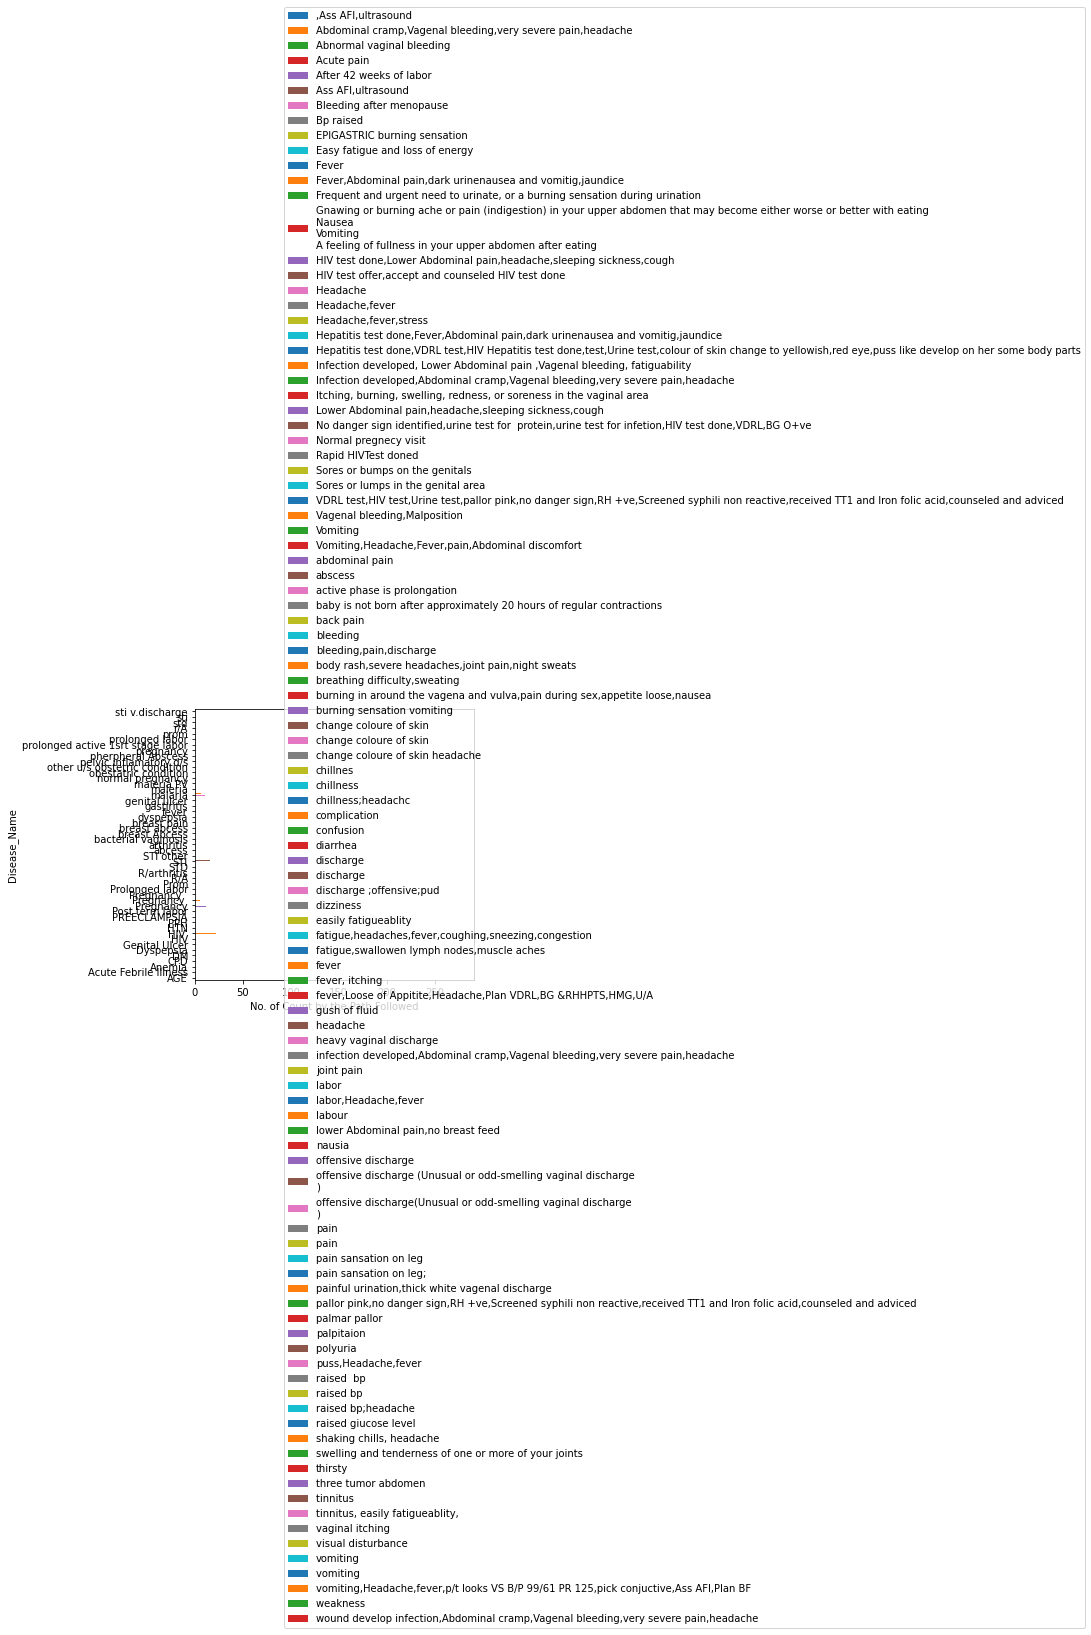

In [12]:
#Implmentaitng cross tab between two variables 
# Viz x=ICPC2 classfication or ICD 11 calssification and y=CP
@interact 
def crosstab(x=list(hcdf.select_dtypes('object').columns), 
             y=list(hcdf.select_dtypes('object').columns)[1:],
             w=5,h=5,
             theme=list(cf.getThemes()), 
             colorscale=list(cf.colors._scales_names.keys())):
    pd.crosstab(hcdf[x],hcdf[y]).plot.barh(figsize=(w,h)).legend(loc='center left', bbox_to_anchor=(0.3, 0.6))
    plt.xlabel('No. of Count by the Path Followed')

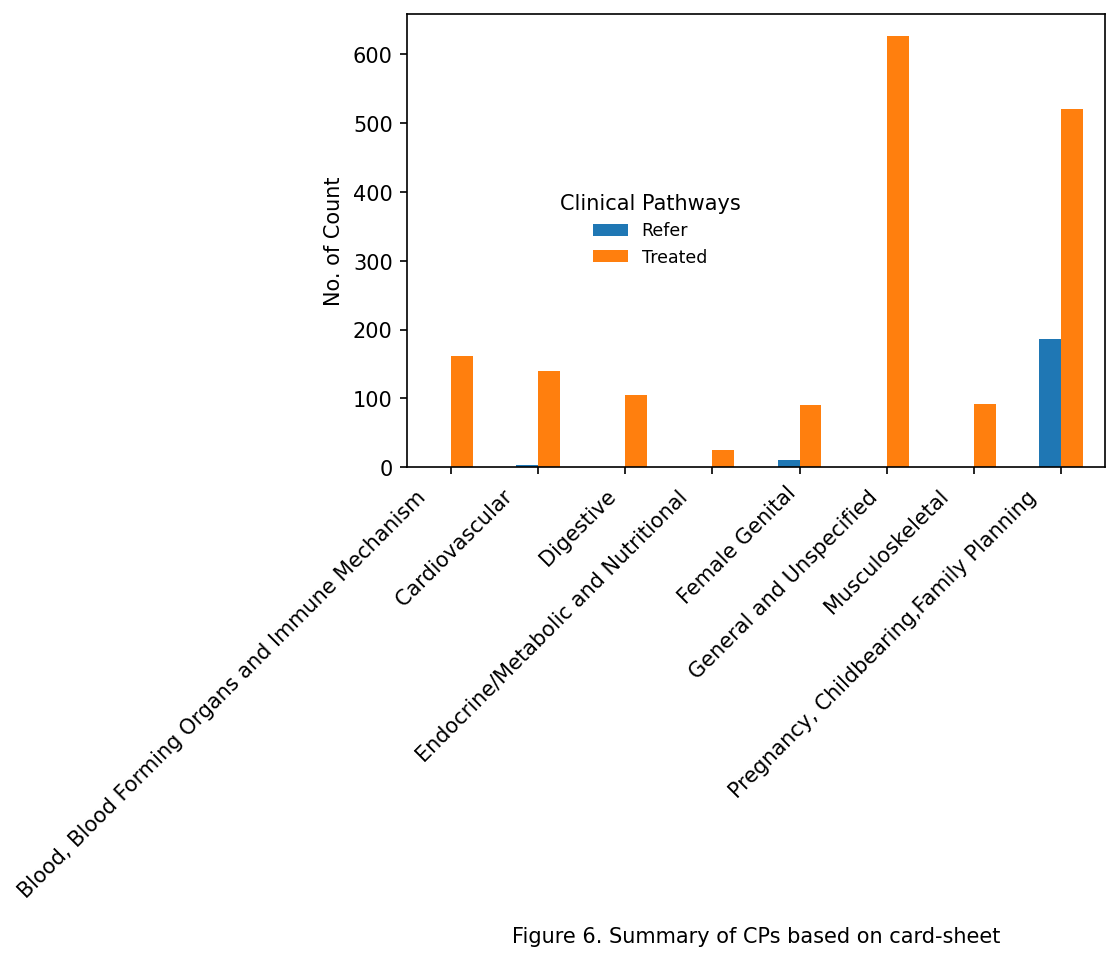

In [54]:
pd.crosstab(hcdf.ICPC2_Classfication,hcdf.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Figure 6. Summary of CPs based on card-sheet')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.5, 0.64),fontsize='small', frameon=False)
# plt.title('Figure 4: This is a somewhat long figure title', fontsize=16)
plt.rcParams['figure.dpi'] = 150 # default for me was 75
#plt.savefig('Figure 6. Summary of CPs based on card-sheet.pdf',dpi=1)


Text(0, 0.5, 'Clincal Pathway')

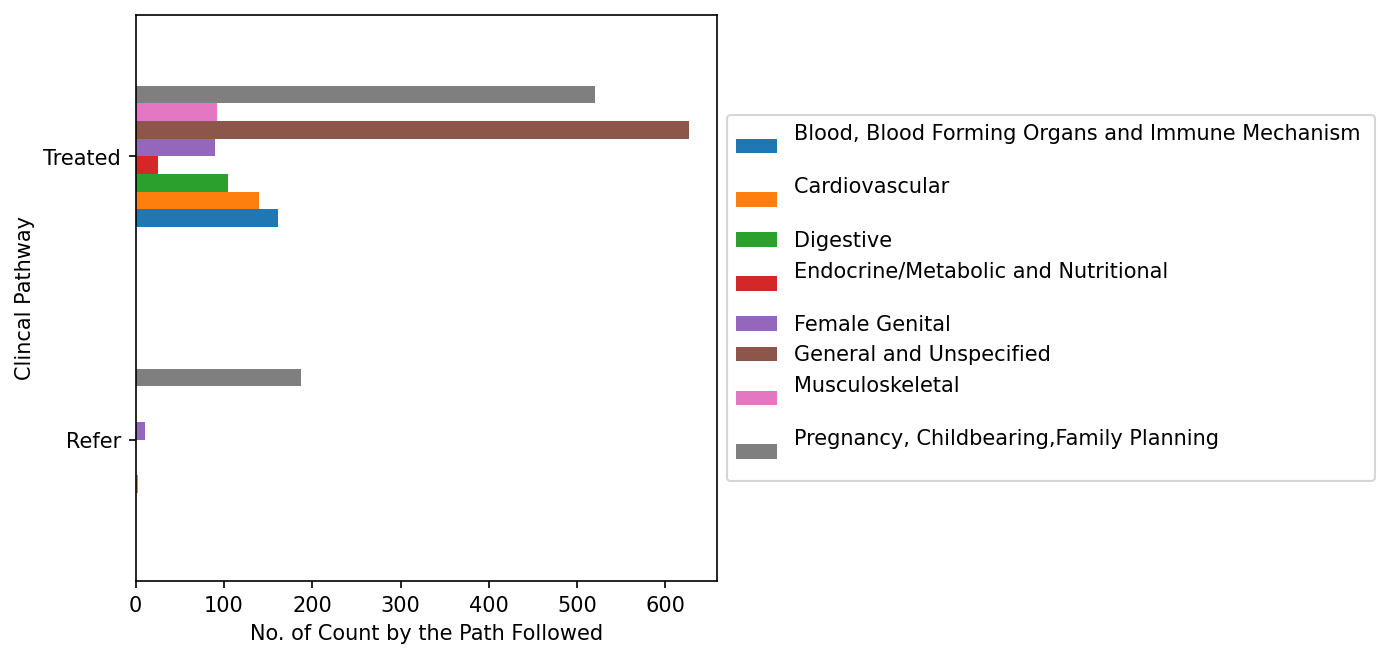

In [14]:
pd.crosstab(hcdf.CP,hcdf.ICPC2_Classfication).plot.barh(figsize=(5,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('No. of Count by the Path Followed')
plt.ylabel('Clincal Pathway')

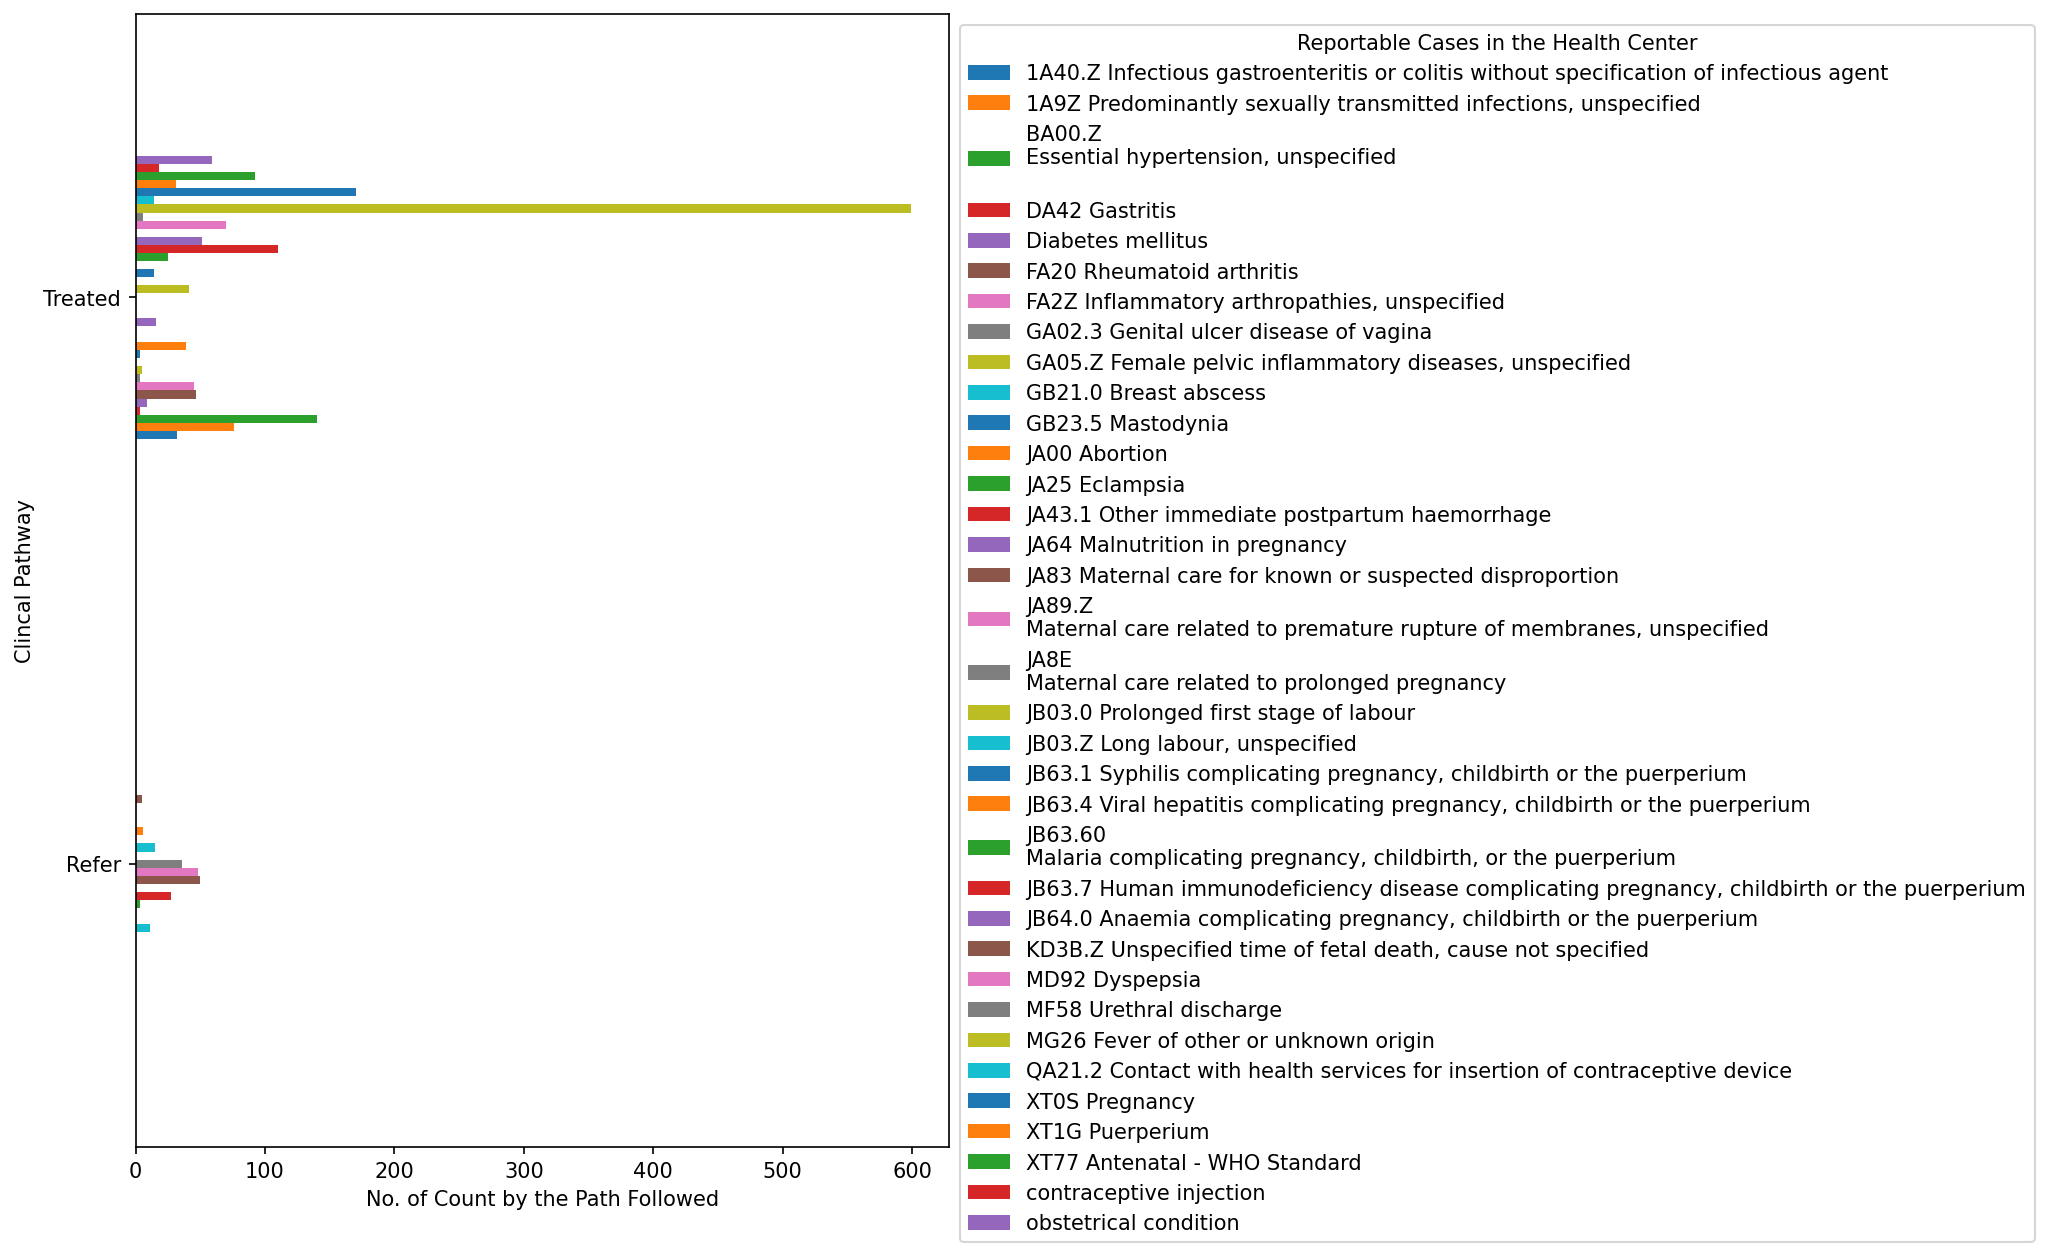

In [15]:
pd.crosstab(hcdf.CP,hcdf.ICD11_Classfication).plot.barh(figsize=(7,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('No. of Count by the Path Followed')
plt.ylabel('Clincal Pathway')
plt.legend(title='Reportable Cases in the Health Center', bbox_to_anchor=(1, 1))

Exploring the frequencey or the summary of based on a certain attributes using catplot. This helps to visulize the frequencey of the flow of refferal based on the three selected data attributes.

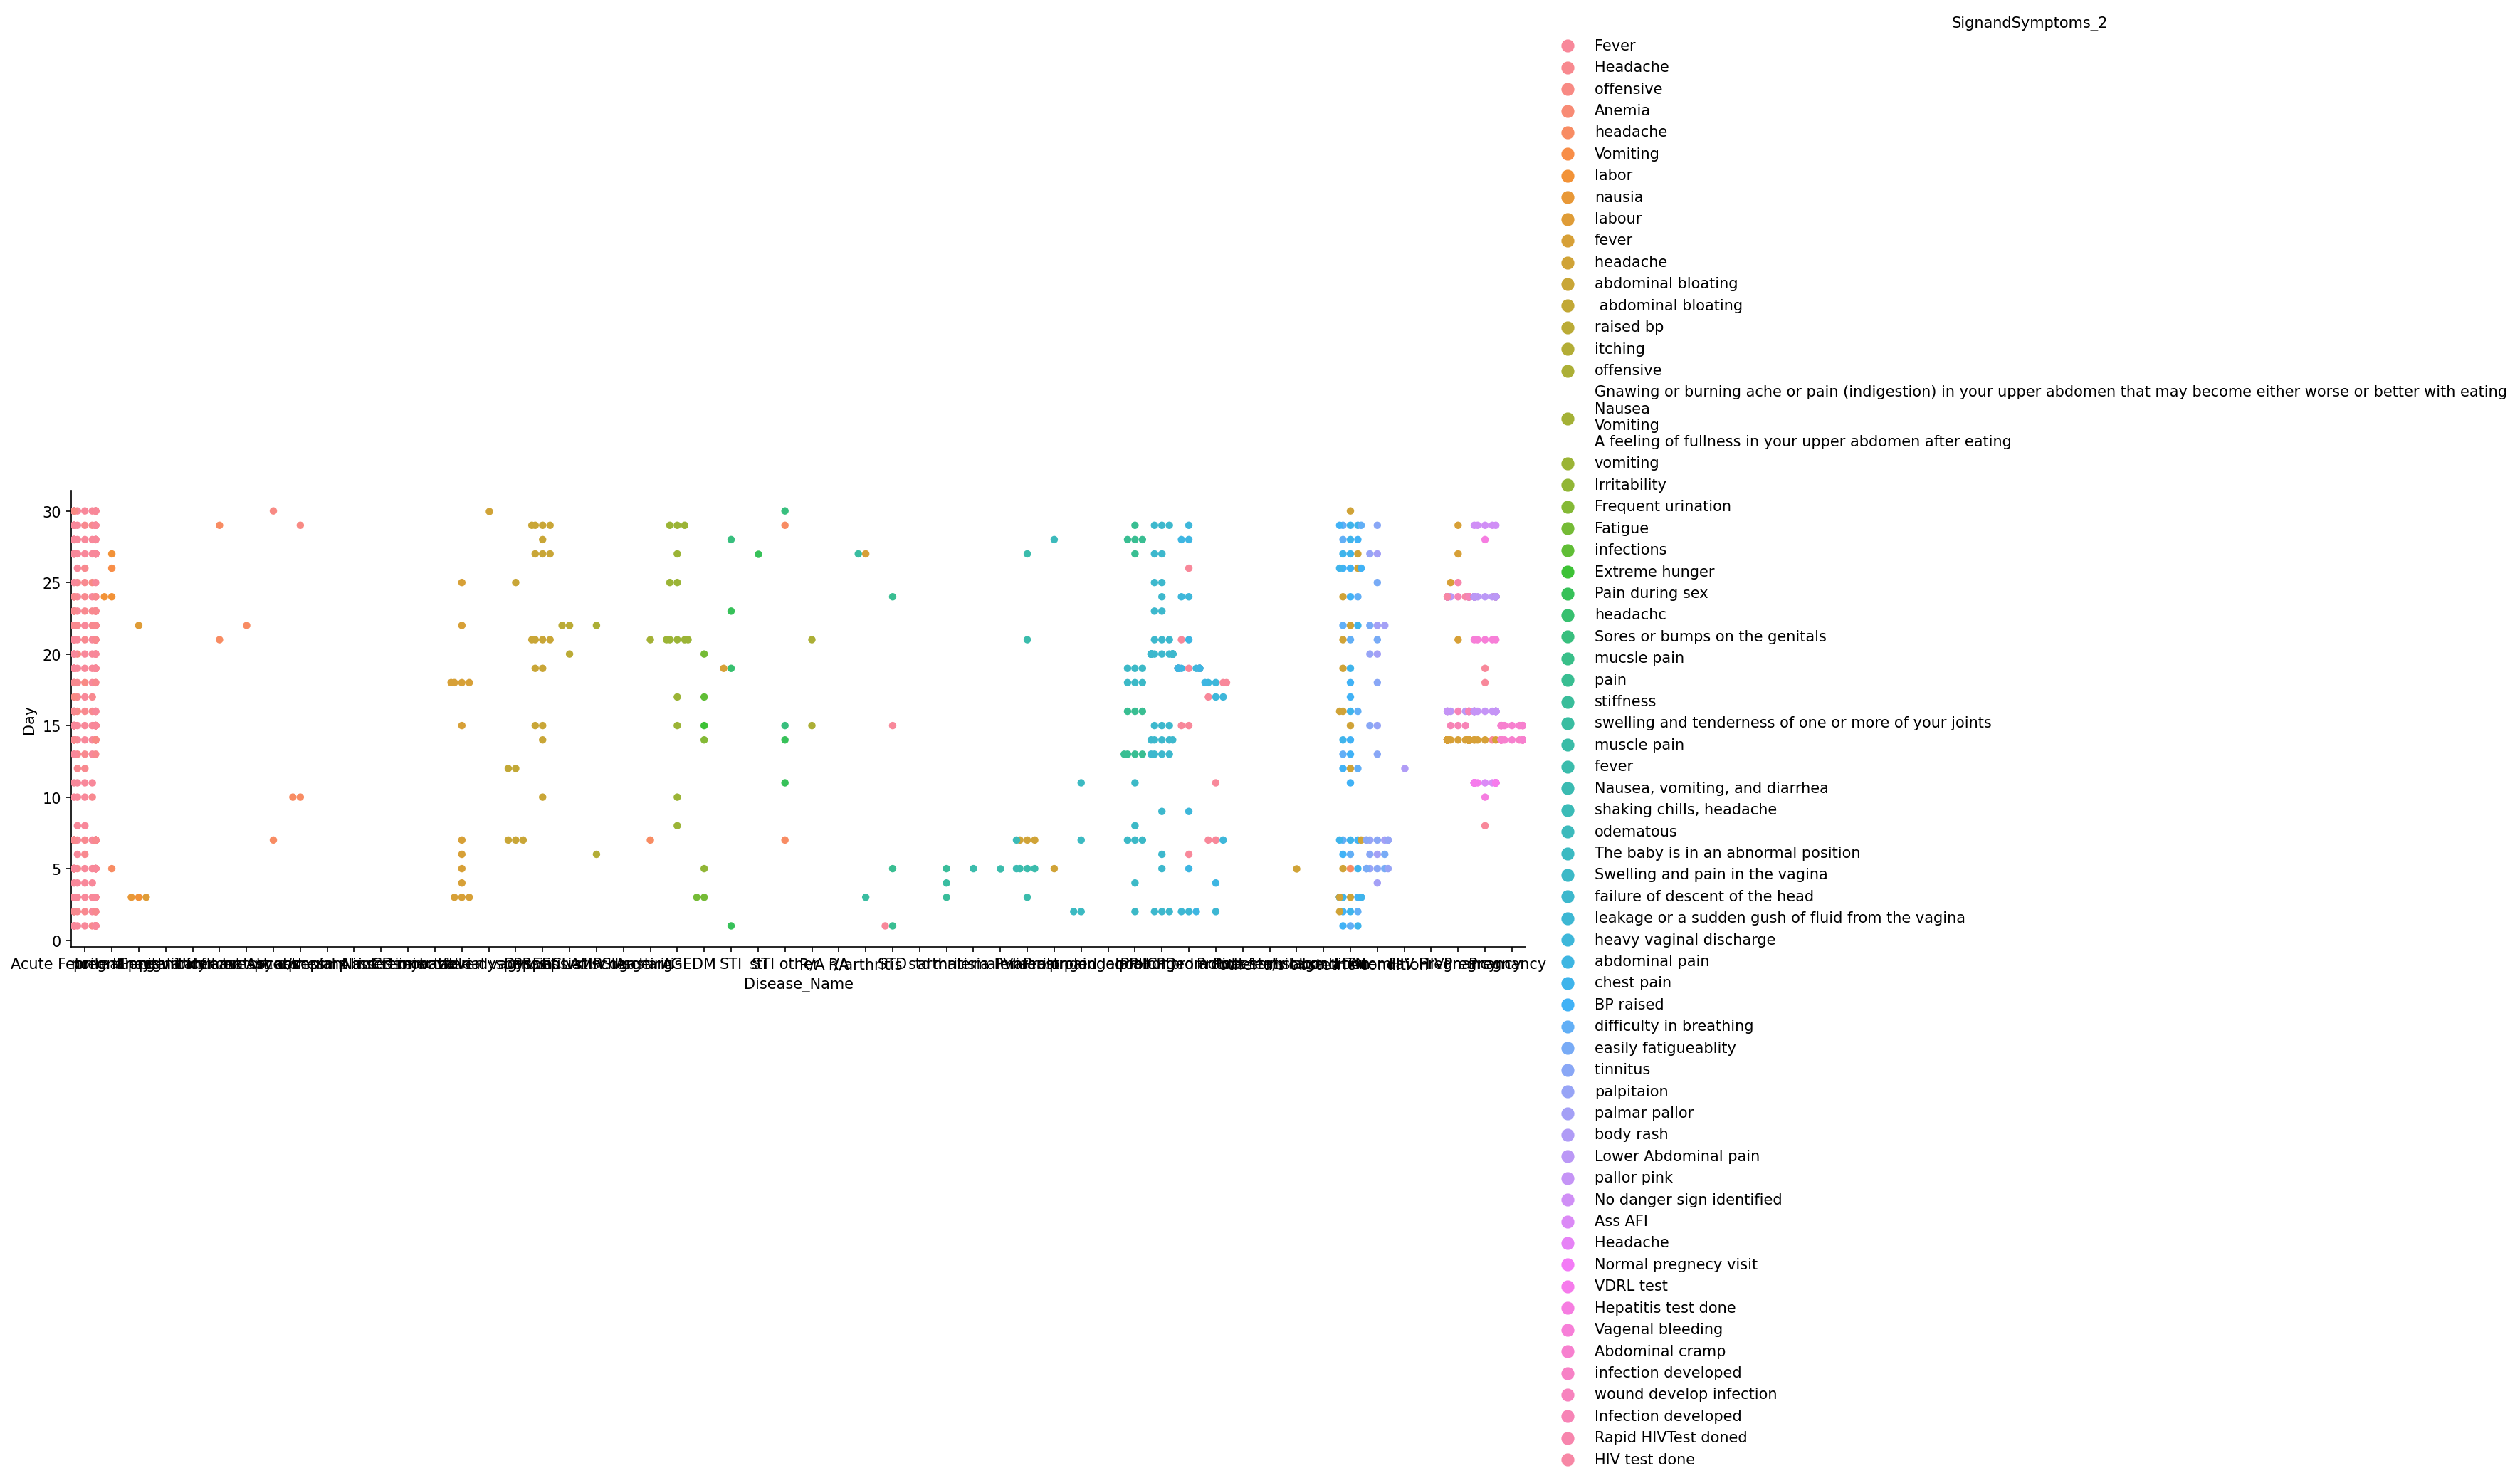

In [16]:
# Visulization of referred reason and age category based on the referred orginazation 
# And also different combination of VIZ also explored 
# x=icpc2 classfication,y=month or year or day and z= cp
@interact 
def catplot(x=list(hcdf.select_dtypes('object').columns), 
            y=list(hcdf.select_dtypes('number').columns)[1:],
            z=list(hcdf.select_dtypes('object').columns)[2:],
            theme=list(cf.getThemes()), 
            colorscale=list(cf.colors._scales_names.keys())):
    sns.catplot(x=x, y=y, hue=z,aspect=3,kind="swarm",  data=hcdf);


Text(0.5, 14.166666666666659, 'Finding or Path Followed')

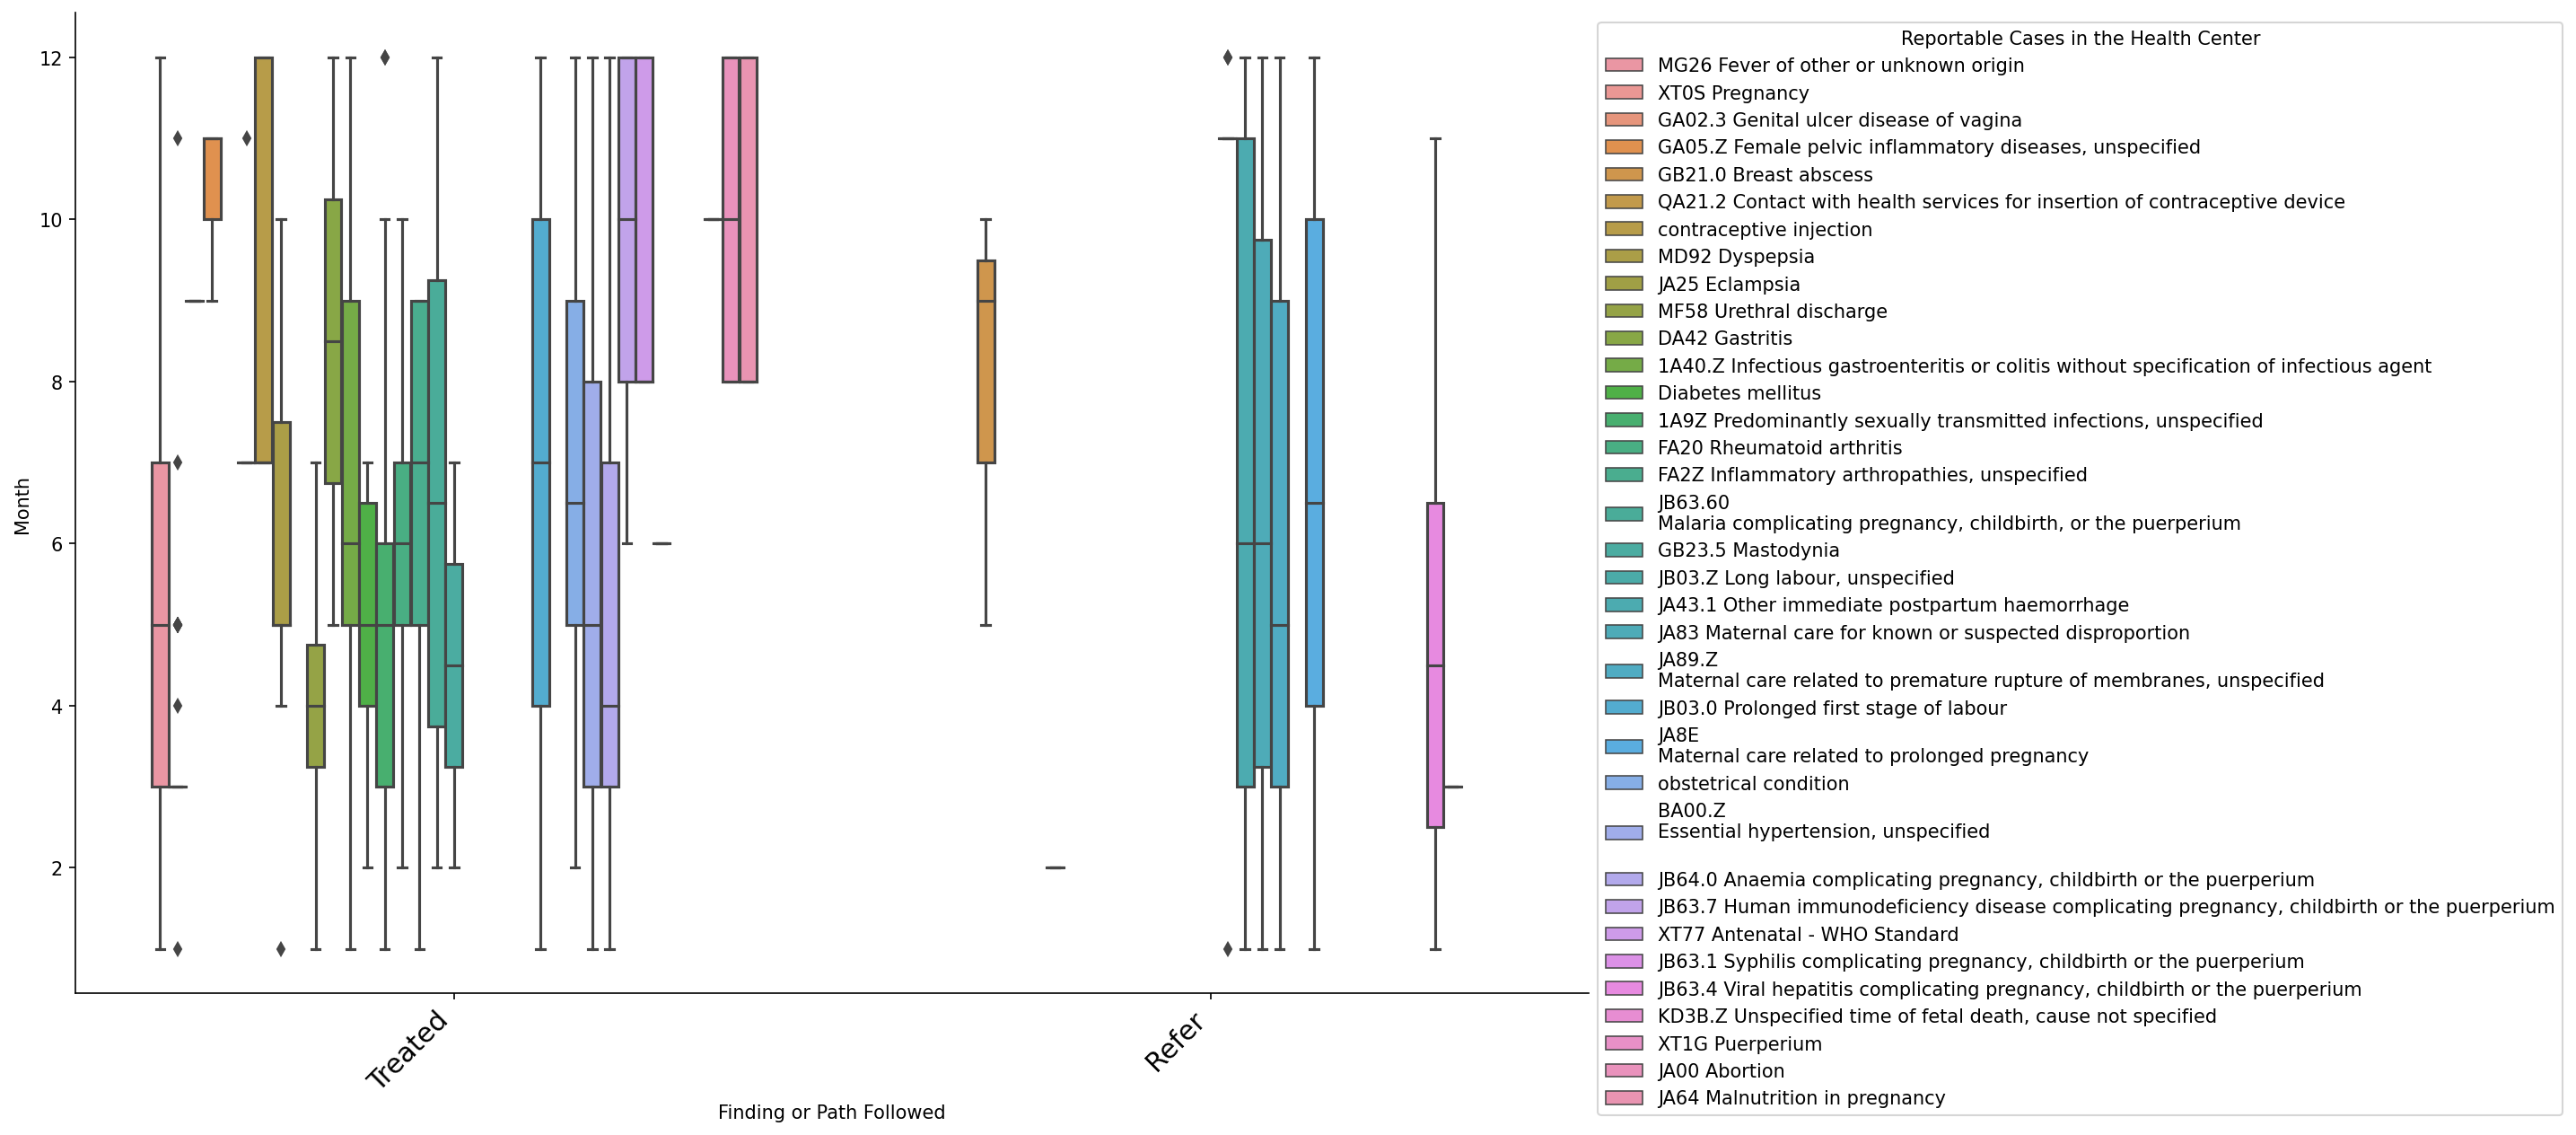

In [17]:
sns.catplot(x="CP", y="Month", hue="ICD11_Classfication",kind="box",dodge=True,
            height=8, aspect=1.5,  data=hcdf,legend=False);
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.legend(title='Reportable Cases in the Health Center', bbox_to_anchor=(1, 1))
plt.xlabel('Finding or Path Followed')

Text(0.5, 14.166666666666659, 'Finding or Path Followed')

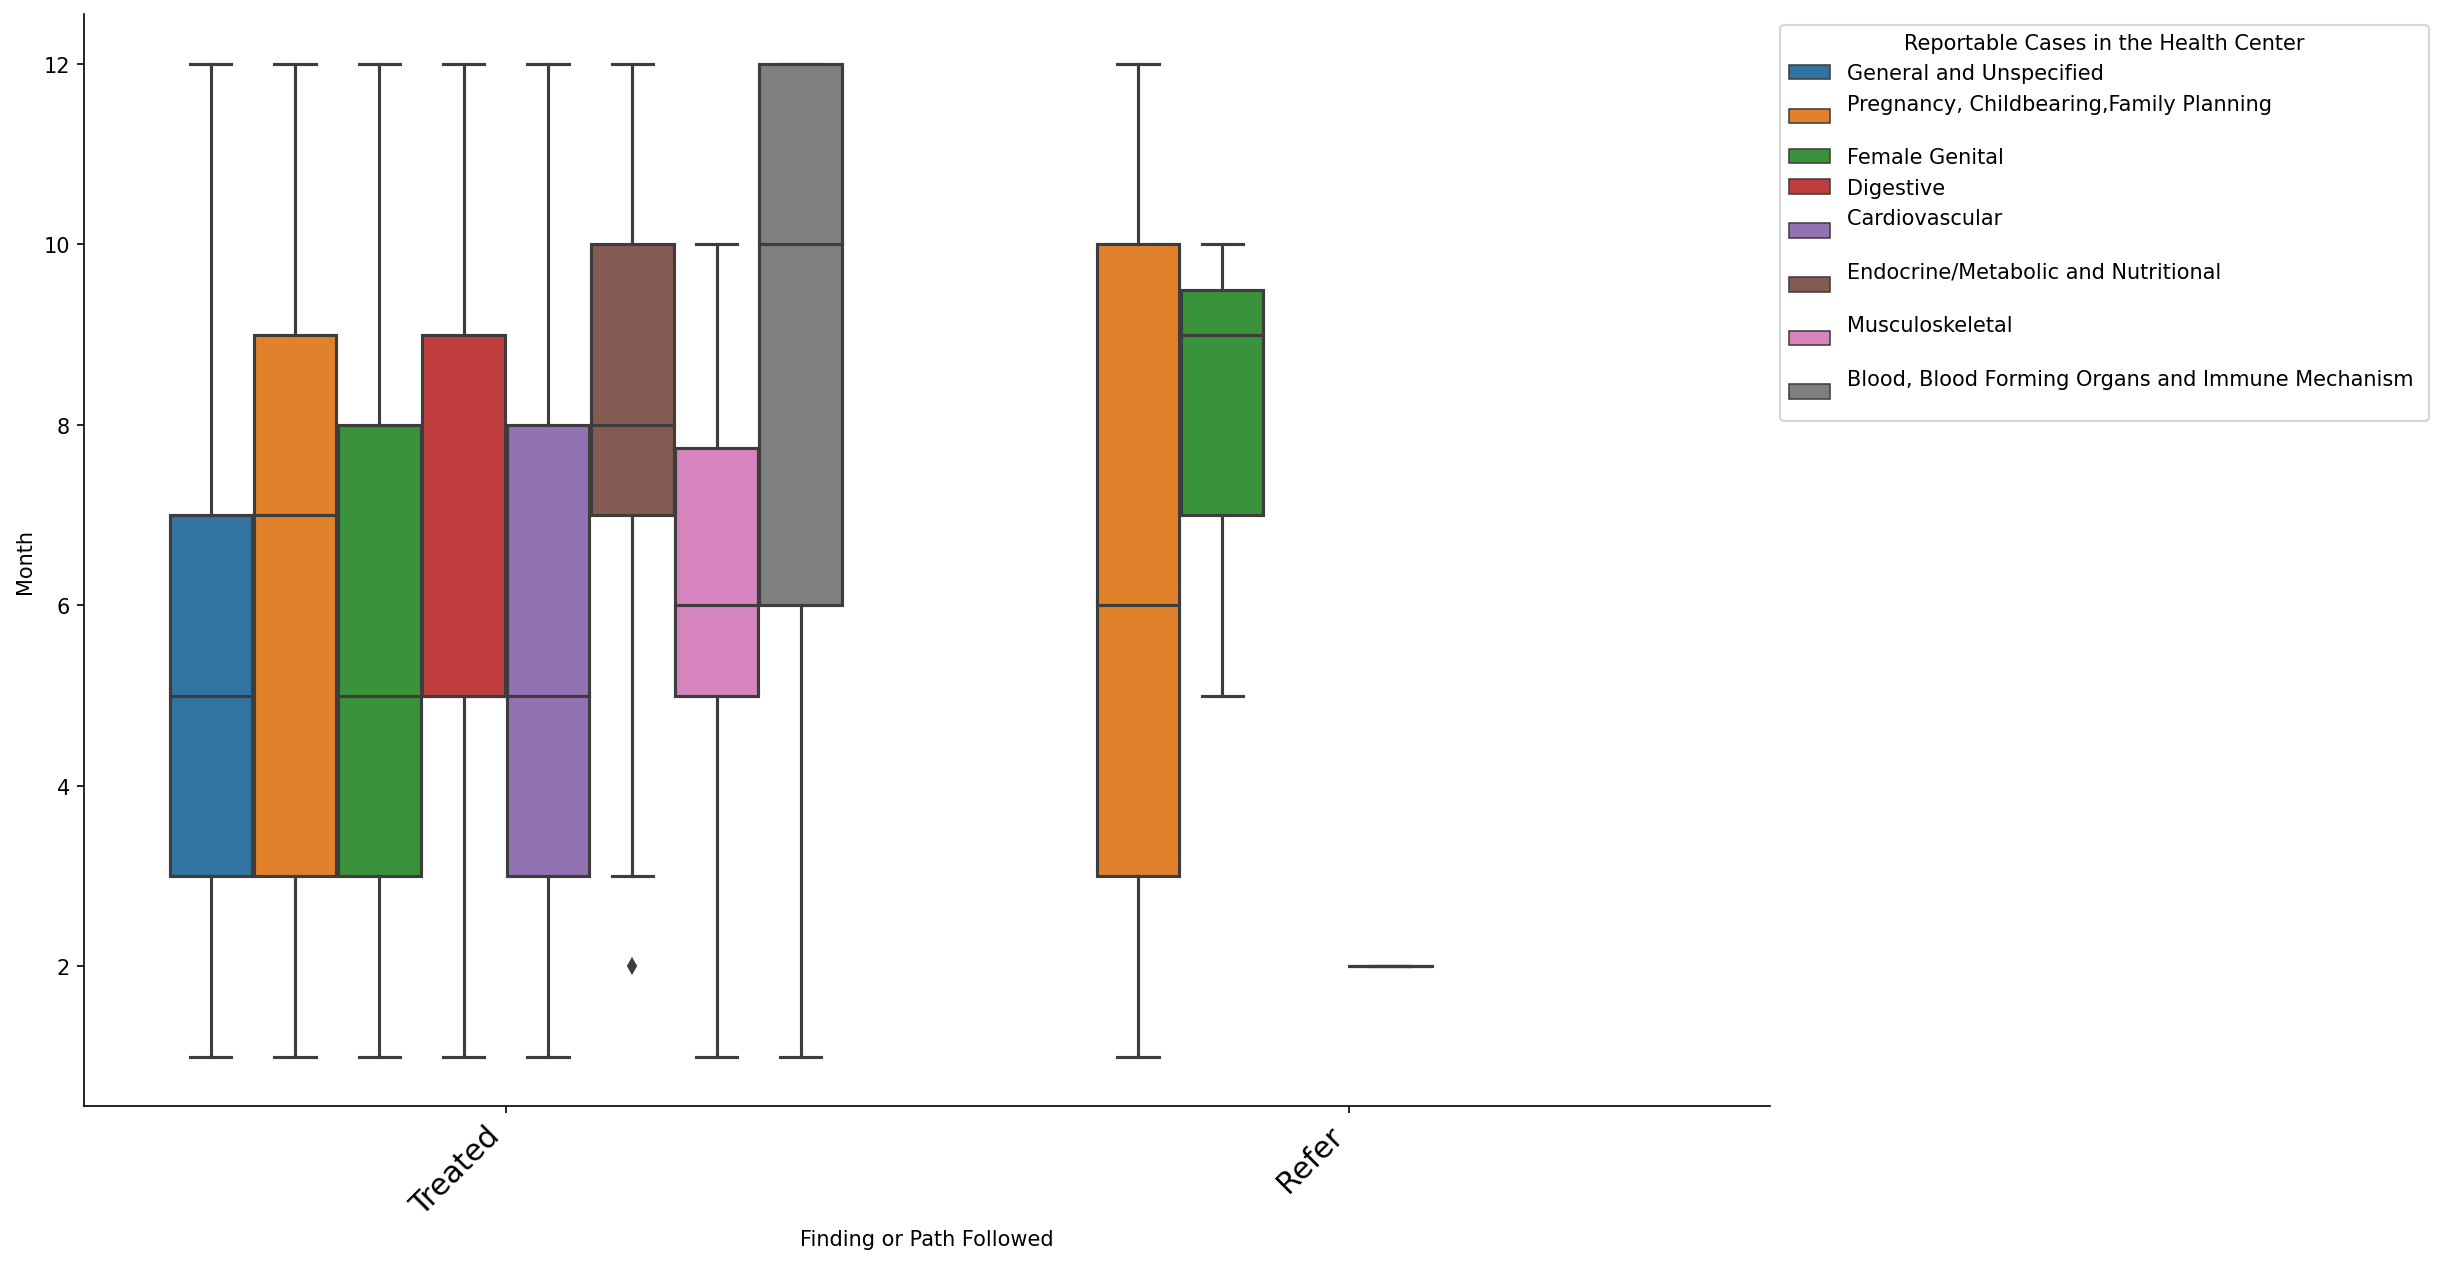

In [18]:
sns.catplot(x="CP", y="Month", hue="ICPC2_Classfication",kind="box",dodge=True,
            height=8, aspect=1.5,  data=hcdf,legend=False);
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.legend(title='Reportable Cases in the Health Center', bbox_to_anchor=(1, 1))
plt.xlabel('Finding or Path Followed')

# Part -II: CG-Generated Clincal Data

1. Import the CSV generated data

In [19]:
cgdf = pd.read_csv("CG_Generated-Table 1.csv", encoding='utf-8')

In [20]:
#counting values for misssing value detection
cgdf.count()

DiseaseName              523
CP                       523
Satus                    523
EmergencySign            521
RelatedDisease           520
Findings                 523
SignandSymptoms_1        522
SignandSymptoms_2        265
SignandSymptoms_3        141
SignandSymptoms_4         46
SignandSymptoms_5         34
SignandSymptoms_6         29
SignandSymptoms_7         19
SignandSymptoms_8         10
SignandSymptoms_9          9
SignandSymptoms_10         8
ICPC2_Classfication      469
ICD11_Classfication      469
ICD11_Parent_Category    469
MatchingTerms1           469
MatchingTerms2           469
MatchingTerms3           469
MatchingTerms4           469
Descriptions             353
dtype: int64

Building Histogram

In [21]:
#building Histogram for categorical values or objects 
@interact 
def hist(x=list(cgdf.select_dtypes('object').columns),
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    cgdf[x].iplot(kind='hist', x=x, mode='markers', xTitle='x',
                   yTitle='count', title='Distribution',
                   theme=theme, colorscale=colorscale)

Interactive visulization: Inspecting objects or catagorical attributes 

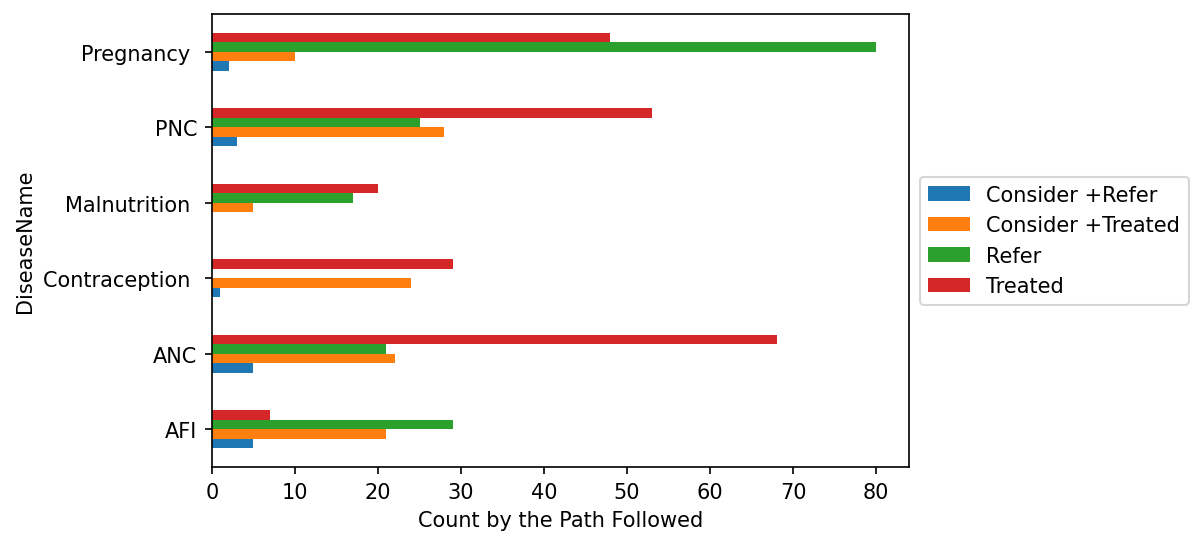

In [22]:
#Implmentaitng cross tab between two variables 
# e.g. x is the disease and y is the path followed 
@interact 
def crosstab(x=list(cgdf.select_dtypes('object').columns), 
             y=list(cgdf.select_dtypes('object').columns)[1:],
             theme=list(cf.getThemes()), 
             colorscale=list(cf.colors._scales_names.keys())):
    pd.crosstab(cgdf[x],cgdf[y]).plot.barh().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Count by the Path Followed')
   

### updated

In [23]:
cgdfupdated = pd.read_csv("CG_Generated_P2_Updated.csv", encoding='utf-8')
cgdfupdated = pd.read_csv("CG_Generated_P2-Updated1.csv", encoding='utf-8')

In [24]:
cgdf.shape

(523, 24)

In [25]:
#cgdfupdated.info()
cgdfupdated.CP.value_counts()

Treated                     930
Refer                       782
TreatedWITHConsideration    287
ReferWIThConsideration       38
Name: CP, dtype: int64

In [26]:
#cgdfupdated['CP'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
cgdfupdated.shape

(2037, 24)

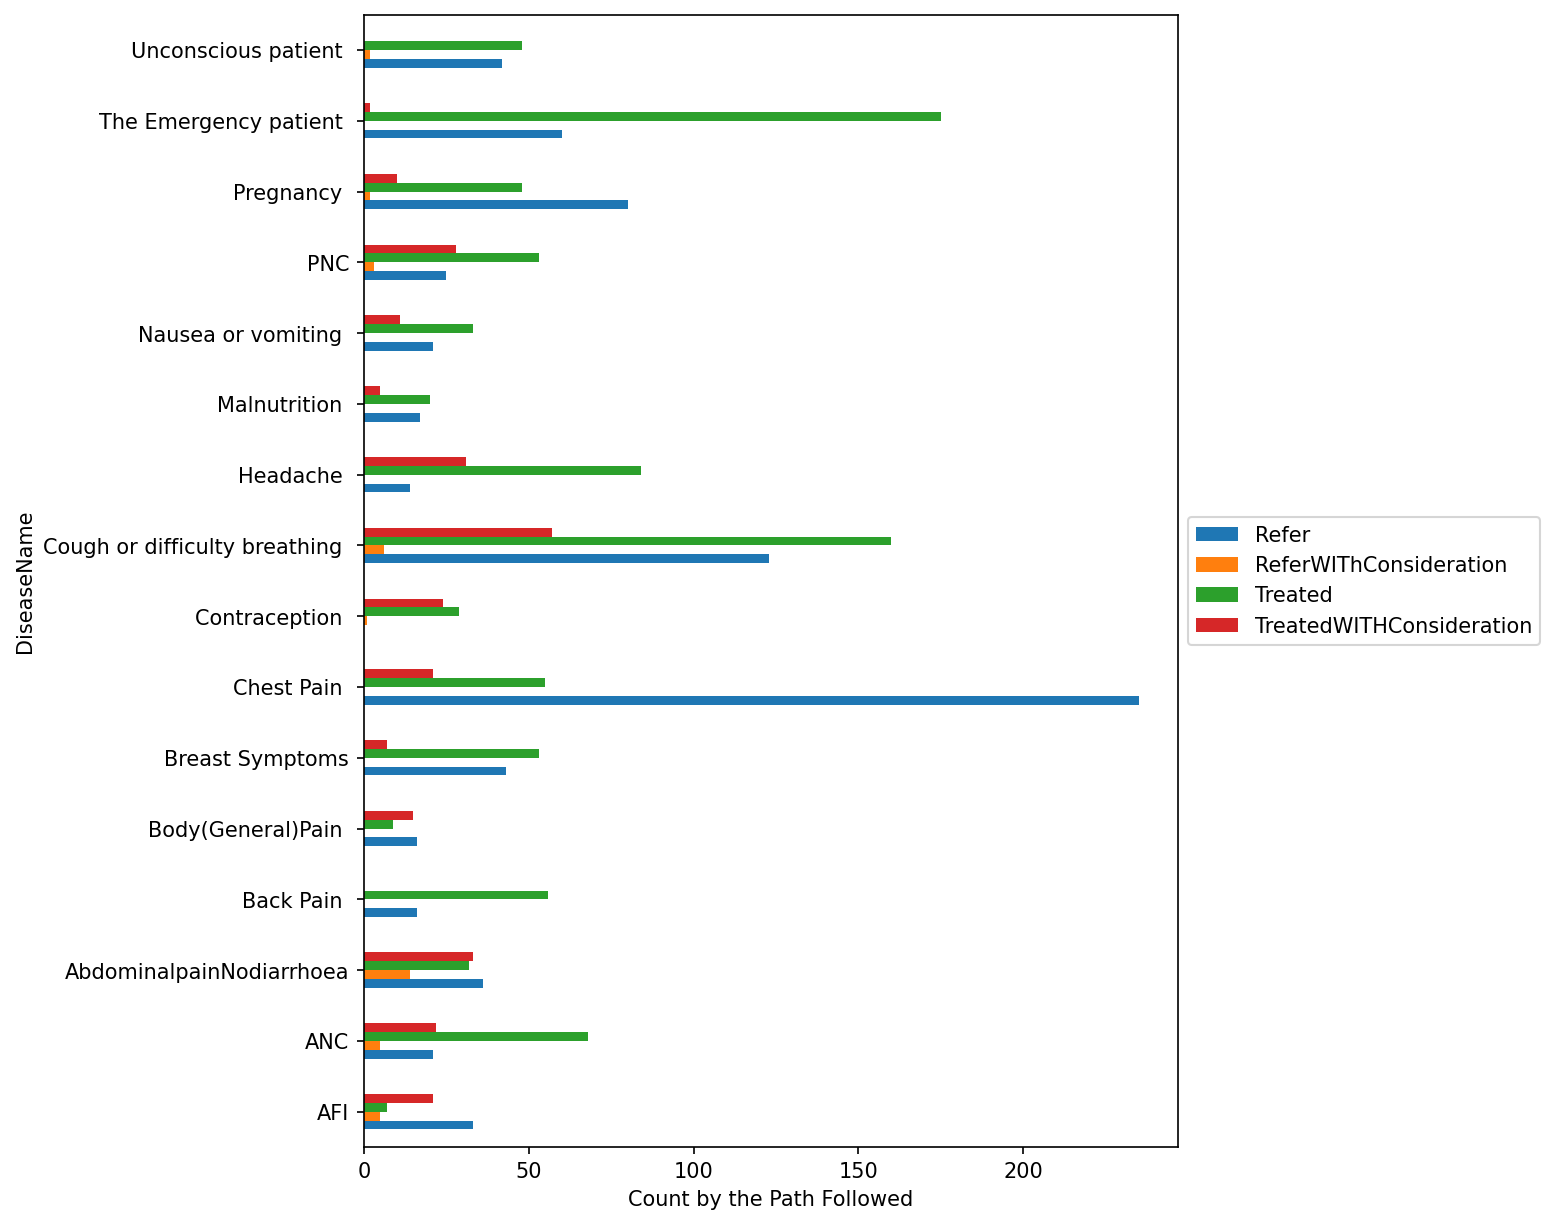

In [27]:
#Implmentaitng cross tab between two variables 
# e.g. x is the disease and y is the path followed 
@interact 
def crosstab(x=list(cgdfupdated.select_dtypes('object').columns), 
             y=list(cgdfupdated.select_dtypes('object').columns)[1:],
             theme=list(cf.getThemes()), 
             colorscale=list(cf.colors._scales_names.keys())):
    pd.crosstab(cgdfupdated[x],cgdfupdated[y]).plot.barh(figsize=(7,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Count by the Path Followed')
    #plt.tight_layout()
    #plt.figure(figsize=(30,30))

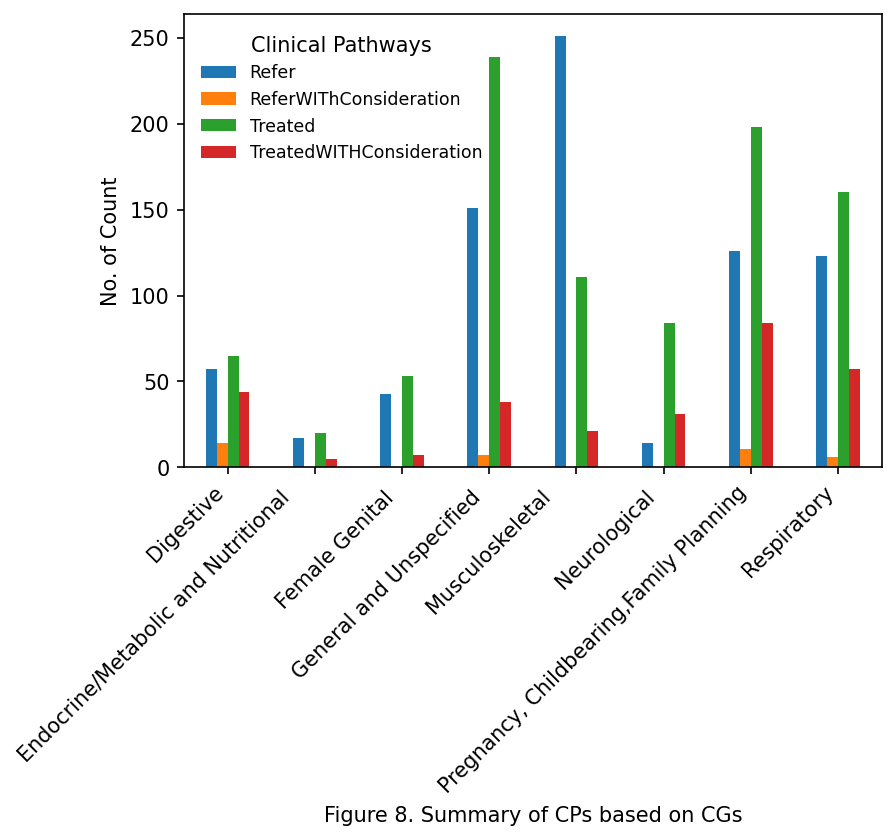

In [49]:
pd.crosstab(cgdfupdated.ICPC2_Classfication,cgdfupdated.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Figure 8. Summary of CPs based on CGs')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.45, 0.64), fontsize='small', frameon=False)
plt.savefig('Figure 8. Summary of CPs based on CGs.pdf')

## Comparision: A case of Fever and Pregancy 

In [29]:
#fever extracted from the CGS
feverCGs=pd.read_csv("Fever_CGS-Table 1.csv", encoding='utf-8')

#fever collected from the card-sheet 
feverCardsheet=pd.read_csv("Fever_CardSheet-Table 1.csv", encoding='utf-8')

#pregnancy extracted from the CGS
pregancyCGs=pd.read_csv("Pregnacy_FullCGs-Table 1.csv", encoding='utf-8')

#pregnancy collected from the card-sheet 
pregnancyCardheet=pd.read_csv("Pregnacy_FullCardsheet-Table 1.csv", encoding='utf-8')

In [30]:
feverCGs.head(1)

,DiseaseName,CP,Satus,EmergencySign,RelatedDisease,Findings,SignandSymptoms_1,SignandSymptoms_2,SignandSymptoms_3,SignandSymptoms_4,...,SignandSymptoms_9,SignandSymptoms_10,ICPC2_Classfication,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions
0,AFI,Refer,Area of low malaria transmission intensity \n,Yes,No,Very severe febrile disease or suspected sepsi...,patient weak and unable to stand \n,weak fast pulse,capillary refill >3 seconds \n,Oral temperature 39.5oC \n,...,no abdominal pain \n,no signs of respiratory distress,General and Unspecified,MG26 Fever of other or unknown origin,"General symptoms, signs or clinical findings",fever,fever NOS (Not Otherwise Specified )\n,unspecified\nfeverish\n,Central fever,An abnormal elevation of body temperature of u...


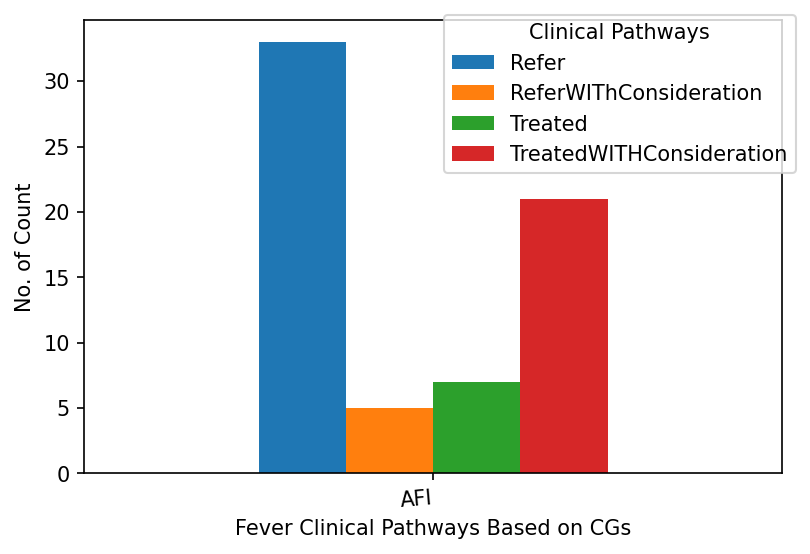

In [31]:
pd.crosstab(feverCGs.DiseaseName,feverCGs.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Fever Clinical Pathways Based on CGs')
plt.xticks(rotation=5, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.5, 0.64))

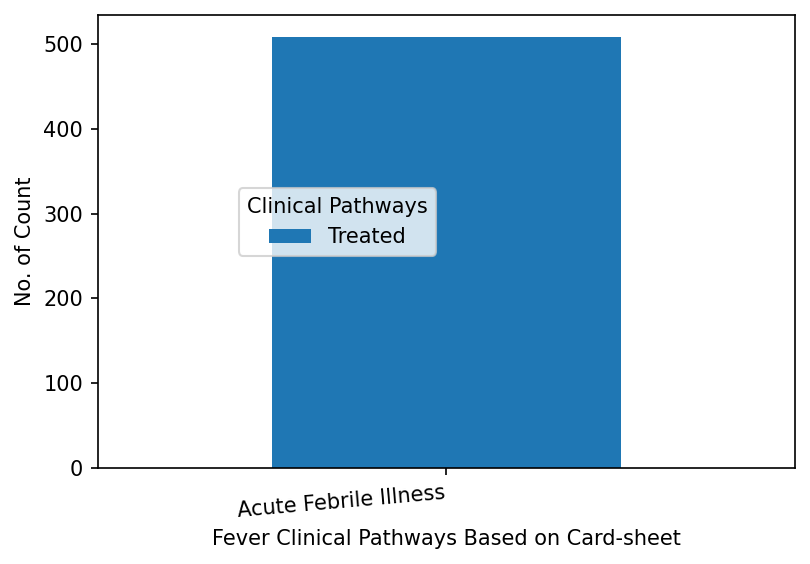

In [32]:
pd.crosstab(feverCardsheet.Disease_Name,feverCardsheet.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Fever Clinical Pathways Based on Card-sheet')
plt.xticks(rotation=5, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.5, 0.64))

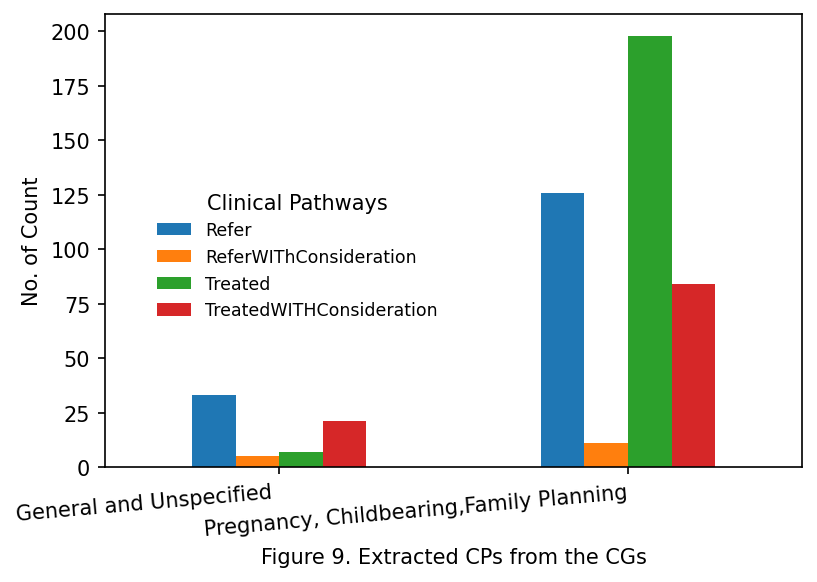

In [51]:
pd.crosstab(pregancyCGs.ICPC2_Classfication,pregancyCGs.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Figure 9. Extracted CPs from the CGs')
plt.xticks(rotation=5, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.5, 0.64), fontsize='small', frameon=False)
plt.savefig('Figure 9. Extracted CPs from the CGs.pdf')

In [34]:
pd.DataFrame({'Percentage from CGs (%)': pregancyCGs.groupby(('CP')).size() / len(pregancyCGs),'Percentage from Card-sheet (%)': pregnancyCardheet.groupby(('CP')).size() / len(pregnancyCardheet)})

,Percentage from CGs (%),Percentage from Card-sheet (%)
Refer,0.327835,0.153783
ReferWIThConsideration,0.032990,NaN
Treated,0.422680,0.846217
TreatedWITHConsideration,0.216495,NaN


In [35]:
pd.DataFrame({'Percentage from Card-sheet': pregancyCGs.groupby(('CP')).size() / len(pregancyCGs)})

,Percentage from Card-sheet
CP,
Refer,0.327835
ReferWIThConsideration,0.032990
Treated,0.422680
TreatedWITHConsideration,0.216495


In [36]:
pregancyCGs['CP'].value_counts()

Treated                     205
Refer                       159
TreatedWITHConsideration    105
ReferWIThConsideration       16
Name: CP, dtype: int64

In [37]:
pregancyCGs.shape

(485, 24)

In [38]:
pd.DataFrame({'Percentage from Card-sheet': pregnancyCardheet.groupby(('CP')).size() / len(pregnancyCardheet)})

,Percentage from Card-sheet
CP,
Refer,0.153783
Treated,0.846217


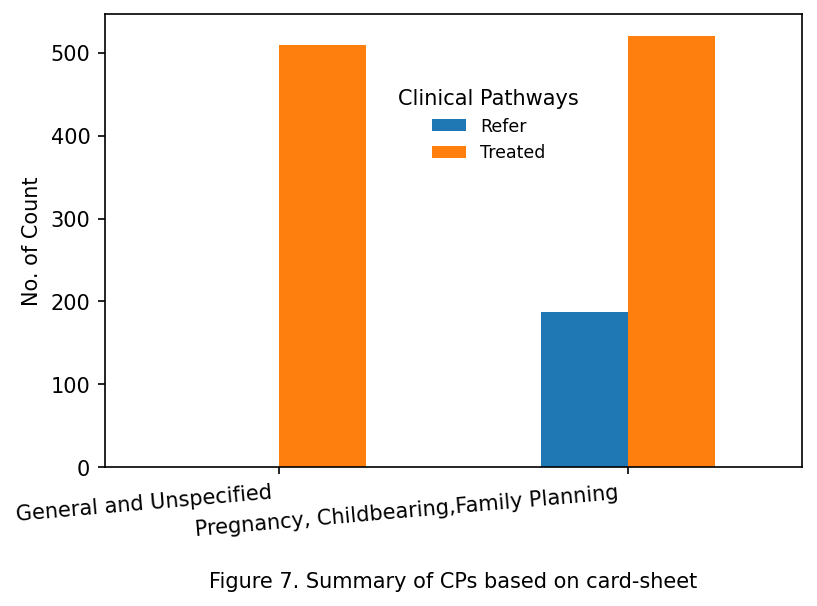

In [53]:
pd.crosstab(pregnancyCardheet.ICPC2_Classfication,pregnancyCardheet.CP).plot.bar()#.legend(loc='uppper left', bbox_to_anchor=(0.8, 0.8)
plt.ylabel('No. of Count')
plt.xlabel('Figure 7. Summary of CPs based on card-sheet')
plt.xticks(rotation=5, horizontalalignment='right',fontsize='medium')
plt.legend(title='Clinical Pathways', bbox_to_anchor=(0.55, 0.64),fontsize='small', frameon=False)
#plt.savefig('Figure 7. Summary of CP based on card-sheet.pdf')

In [40]:
pregnancyCardheet.shape

(1216, 26)

In [41]:
pregnancyCardheet

,SN,Disease_Name,SignandSymptoms_1,SignandSymptoms_2,SignandSymptoms_3,SignandSymptoms_4,SignandSymptoms_5,SignandSymptoms_6,SignandSymptoms_7,SignandSymptoms_8,...,CP,TR_Date,ICPC2_Classfication,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions
0,72,pregnancy,vomiting,headache,fever,NaN,NaN,NaN,NaN,NaN,...,Treated,3/5/10,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
1,1263,pregnancy,bleeding,Vomiting,headache,NaN,NaN,NaN,NaN,NaN,...,Treated,26/7/09,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
2,1554,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,24/5/11,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
3,1556,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,24/5/11,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
4,1560,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,27/4/2011,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
5,1567,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,4,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
6,1569,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,5,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
7,1573,pregnancy,labor,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,6,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
8,491,normal pregnancy,labour,labor,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,1/3/10,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."
9,517,normal pregnancy,nausia,nausia,NaN,NaN,NaN,NaN,NaN,NaN,...,Treated,5/3/10,"Pregnancy, Childbearing,Family Planning \n",XT0S Pregnancy,Time in Life,Supervision of normal pregnancy,antenatal care for normal first pregnancy,Supervision of normal pregnancy other than fir...,Pregnancy,"For the mother, the period of time between fer..."


In [42]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

NameError: name 'X' is not defined

In [ ]:
pregnancyCardheet["CP"] = pregnancyCardheet["CP"].astype('category')
pregnancyCardheet.dtypes

In [ ]:
pregnancyCardheet["CP_style_cat"] = pregnancyCardheet["CP"].cat.codes
pregnancyCardheet.head(2)

In [ ]:
sns.catplot(x="CP_style_cat", y="ICPC2_Classfication", hue="CP", kind="swarm", data=pregnancyCardheet);

In [ ]:
sns.catplot(x="ICPC2_Classfication", y="CP", hue="CP_style_cat", kind="swarm", data=pregnancyCardheet);

In [ ]:
sns.catplot(y="CP", hue="ICPC2_Classfication", kind="count",
            palette="pastel", edgecolor=".6",
            data=pregnancyCardheet);


In [ ]:
pregancyCGs["CP"] = pregancyCGs["CP"].astype('category')

In [ ]:
pregancyCGs["CPCGS_style_cat"] = pregancyCGs["CP"].cat.codes
pregancyCGs.head(2)

In [ ]:
sns.catplot(x="CPCGS_style_cat", y="ICPC2_Classfication", hue="CP", kind="swarm",aspect=.5, data=pregancyCGs);

In [ ]:
sns.catplot(x="CP_style_cat", y="ICPC2_Classfication", hue="CP", kind="swarm",aspect=.5, data=pregnancyCardheet);

In [ ]:
sns.barplot(x="ICPC2_Classfication", y="CPCGS_style_cat", data=pregancyCGs)

In [ ]:
sns.catplot(y="CP", hue="ICPC2_Classfication", kind="count",
            palette="pastel", edgecolor=".6",
            data=pregancyCGs);

In [ ]:
sns.catplot(y="CP", hue="ICPC2_Classfication", kind="count",
            palette="pastel", edgecolor=".6",
            data=pregnancyCardheet);

In [ ]:
diseaseList = pregnancyCardheet.CP
countDiseaseList = diseaseList.value_counts()
plt.title('Summary', fontsize=14)
plt.xlabel('Pregnancy Clinical Pathways ', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True)
countDiseaseList.plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

### count and summarized CP [both the cardsheet and CGs]

In [ ]:
countSummaryFROMCG=cgdfupdated.groupby(["ICPC2_Classfication", "CP"]).size()
countSummaryFROMCardSheet=hcdf.groupby(["ICPC2_Classfication", "CP"]).size()

In [ ]:
countSummaryFROMCG

In [ ]:
countSummaryFROMCardSheet

###  Save to Excel and Import for Visulization

In [ ]:
importCPCountSummary = pd.read_csv("CountComparision-Table 1.csv", encoding='utf-8')

In [ ]:
importCPCountSummary.CP.nunique()

In [ ]:
# Display and Check the reuslt 
#new = old[['A', 'C', 'D']].copy()
copyCGfrom = importCPCountSummary[['ICPC2Classification', 'CP', 'CP_in_Cardsheet']].copy()
copyCSfrom = importCPCountSummary[['ICPC2Classification', 'CP', 'CP_in_CGs']].copy()

In [ ]:
importCPCountSummary.info()

In [ ]:
importCPCountSummary

In [ ]:
importCPCountSummary.plot(x ='ICPC2Classification', y=['CP_in_Cardsheet','CP_in_CGs'], kind = 'bar', figsize=(15,7))

In [ ]:
selectedP= importCPCountSummary.loc[importCPCountSummary['ICPC2Classification'] == 'Pregnancy, Childbearing,Family Planning']
selectedPT = cgdfupdated.loc[cgdfupdated['DiseaseName'] == 'AFI']

In [ ]:
selectedP.plot(x ='CP', y=['CP_in_Cardsheet','CP_in_CGs'], kind = 'barh', figsize=(7,5))

In [ ]:
selectedPT.head(1)

In [ ]:
selectedPT['CP'].nunique()

In [ ]:
diseaseList = selectedPT.CP
countDiseaseList = diseaseList.value_counts()
plt.title('Summary', fontsize=14)
plt.xlabel('Followed Clinical Pathways ', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True)
countDiseaseList.plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [ ]:

AggregatedCPSummary = pd.read_csv("AggregatedSummary-Table 1.csv", encoding='utf-8')

In [ ]:
AggregatedCPSummary

In [ ]:
AggregatedCPSummary.plot(x ='CP_Summary', y=['CP_Collected_From_Cardsheet','CP_Extracted_From_CGs'], kind = 'bar')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.ylabel('No. of Count')
plt.xlabel('Clincal Pathway Followed')

# Part III - Comparision 

# Next steps

Building an algorithm for generating the number of possible paths or patterns for detecting the patient flow treatment and referral paths or matching. Also, able to detect and explore findings that point to more than one disease called "consideration path or crossroad PLUS(+) treatable or referral"

# repalce all the missing value with temp value
hcdf.ICPC2_Classfication.replace(['NaN'],'Other unclassified', inplace=True)
hcdf.SignandSymptoms_1.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_2.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_3.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_4.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_5.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_7.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_8.replace(['NaN'],'not listed', inplace=True)
hcdf.SignandSymptoms_9.replace(['NaN'],'not listed', inplace=True)
hcdf.Emergency_Sign.replace(['NaN'],'not listed', inplace=True)
hcdf.Finding.replace(['NaN'],'not listed', inplace=True)

hcdf.RelatedDisease_Yes.replace(['NaN'],'not listed', inplace=True)

hcdf.RelatedDisease_No.replace(['NaN'],'not listed', inplace=True)

hcdf.TR_Date.replace(['NaN'],'not listed', inplace=True)
hcdf.ICPC2_Classfication.replace(['NaN'],'not listed', inplace=True)

hcdf.ICD11_Classfication.replace(['NaN'],'not listed', inplace=True)

hcdf.ICD11_Parent_Category.replace(['NaN'],'not listed', inplace=True)
hcdf.MatchingTerms1.replace(['NaN'],'not listed', inplace=True)
hcdf.MatchingTerms2.replace(['NaN'],'not listed', inplace=True)
hcdf.MatchingTerms3.replace(['NaN'],'not listed', inplace=True)
hcdf.MatchingTerms4.replace(['NaN'],'not listed', inplace=True)
hcdf.Descriptions.replace(['NaN'],'not listed', inplace=True)
    